In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd

In [14]:
m_map={
    'Left':1,
    'Right':2
    
}
k_map={
    'Yes':1,
    'No':0
}

In [19]:
df=pd.read_csv('data.csv')
df=df.drop(columns=['ID','Photo','Name','Flag','Nationality','Club','Club Logo','Value','Wage','Special','Work Rate','Body Type','Jersey Number','Joined','Loaned From','Contract Valid Until','Height','Weight','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','Release Clause','RCM'])
df=df.dropna(how='any')
df['Preferred Foot']=df['Preferred Foot'].map(m_map)
df['Real Face']=df['Real Face'].map(k_map)
df['POS']=df['Position']
df=df.drop(columns=['Position','Unnamed: 0'])
display(df)


,Age,Overall,Potential,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Real Face,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,POS
0,31,94,94,1,5.0,4.0,4.0,1,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,RF
1,33,94,94,2,5.0,4.0,5.0,1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,ST
2,26,92,93,2,5.0,5.0,5.0,1,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,LW
3,27,91,93,2,4.0,3.0,1.0,1,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,GK
4,27,91,92,2,4.0,5.0,4.0,1,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,RCM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,47,65,2,1.0,2.0,2.0,0,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,CM
18203,19,47,63,2,1.0,2.0,2.0,0,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,ST
18204,16,47,67,2,1.0,3.0,2.0,0,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,ST
18205,17,47,66,2,1.0,3.0,2.0,0,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,RW


In [20]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)
Y

array([21, 26, 14, ..., 26, 24,  4])

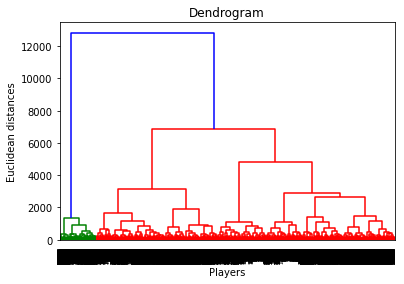

In [34]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Players')
plt.ylabel('Euclidean distances')
plt.show()

In [31]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 26, affinity = 'euclidean', linkage = 'ward')
y_pred= hc.fit_predict(X)

In [32]:
from sklearn import metrics
metrics.adjusted_rand_score(Y,y_pred)

0.20200318414540527

In [33]:
metrics.adjusted_mutual_info_score(Y,y_pred)  

0.37989329381117354